# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

1. No missing values; when the price goes over $999, it includes a comma. This causes problems when being read as an integer. I just went through and removed the comma and quotes, maintaining the price while removing any possibility of misreading.
2. Out of 12925 records in the original dataset, 9848 did not have a value for `subject_injury`. This is absolutely a concern, since that represents the overwhelming majority of the data available and it's possible that what remains is not representative of the overall dataset. The overwhelming majority of incidents without `subject_injury` values involved the use of bodily force, followed by chemical irritants and tasers.
4. `ImposedSentenceAllChargeInContactEvent` seems to be numeric data. My best interpretation of it is that it represents the total length of a prison sentence. Therefore, it needs to be coerced to numerical data, with empty spaces replaced by `nan`s.

In [93]:
import numpy as np
import pandas as pd

# For 1.1
df = pd.read_csv("data/airbnb_hw.csv")
df["Price"] = df["Price"].str.replace(",", "")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df.to_csv("data/airbnb_hw_cleaned.csv")

# For 1.2
df = pd.read_csv("data/mn_police_use_of_force.csv")
df["subject_injury"] = pd.to_numeric(df["subject_injury"].replace("",np.nan).replace("Yes", "1").replace("No", "0"), errors="coerce")
df["subject_injury_nan"] = pd.to_numeric(df["subject_injury"].isnull().replace(False, "0").replace(True, "1"), errors="coerce")
print(df["subject_injury"].value_counts())
print("Missing:", sum(df["subject_injury_nan"]), f"({round(100 * sum(df["subject_injury_nan"]) / len(df), 1)}%)")
print(pd.crosstab(df["subject_injury_nan"], df["force_type"]))
df.to_csv("data/mn_police_use_of_force_cleaned.csv")

# For 1.3
df = pd.read_parquet("data/justice_data.parquet")
df["WhetherDefendantWasReleasedPretrial"] = df["WhetherDefendantWasReleasedPretrial"].replace([9], np.nan)

# For 1.4
print(df["ImposedSentenceAllChargeInContactEvent"].value_counts())
df["ImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(df["ImposedSentenceAllChargeInContactEvent"].replace([" ", ""], np.nan), errors="coerce")
print(df["ImposedSentenceAllChargeInContactEvent"].value_counts())
print(df["SentenceTypeAllChargesAtConvictionInContactEvent"].value_counts())
df.to_parquet("data/justice_data_cleaned.parquet")

subject_injury
1.0    1631
0.0    1446
Name: count, dtype: int64
Missing: 9848 (76.2%)
force_type          Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_nan                                                    
0                       2          2379                172        2   
1                       2          7051               1421        0   

force_type          Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_nan                                                      
0                                  77                 74            0   
1                                  27                 74           87   

force_type          Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury_nan                                                        
0                                        3                            0   
1                                        0                          170   

force_type          Police K9 Bite

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

3. Attacks have generally increased over time; they peaked around 1960, hit a low around 1980, then increased steadily before peaking in the mid-2010s and precipitously declining in the 2020s.
5. 80.3%
6. 73.7%
8. Attacks against women are more likely to be unprovoked; the ratio of unprovoked to provoked attacks against women is over 20:1, as opposed to around 8:1 for men. Unprovoked attacks have a higher fatality rate. Attacks against men are more likely to be fatal. I think I will stick to land in the future.
9. 10.1%

Sex
M    5618
F     792
Name: count, dtype: int64
Male: 80.3%
Unprovoked: 73.7%
Type  Provoked  Unknown  Unprovoked
Sex                                
F           31       91         670
M          548      755        4315
Fatal Y/N      N  Unknown     Y
Type                           
Provoked     611        3    21
Unknown      450       11   199
Unprovoked  3825       57  1254
Fatal Y/N     N  Unknown     Y
Sex                           
F           603        4   120
M          3922       36  1245
White sharks: 10.1%


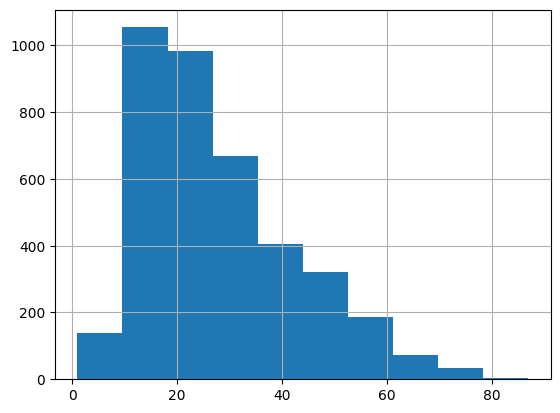

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_excel("data/GSAF5.xls")
# drop columns
df.dropna(axis=1, how="all", inplace=True)
# clean year variable
df["Year"] = df["Year"].replace(0, np.nan)
df_since_1940 = df[(df["Year"] >= 1940)]
# df_since_1940["Year"].hist(bins=86)
# clean age variable
df["Age"] = pd.to_numeric(df["Age"].replace([" ", "\n ", "?", "  ", "X"], np.nan).replace("2½", 2.5).replace("6½", 6.5), errors="coerce")
df["Age"].hist()
# clean sex variable
df["Sex"] = df["Sex"].replace(["N", "."], np.nan).replace(["lli", "M x 2", " M", "M "], "M")
print(df["Sex"].value_counts())
print("Male:", f"{round(100 * len(df[(df["Sex"] == "M")]) / len(df), 1)}%")
# clean type variable
df["Type"] = df["Type"].replace([" Provoked"], "Provoked").replace(["Sea Disaster", "", "?", "Boat", "Invalid", "Questionable", "Sea Disaster", "Unconfirmed", "Under investigation", "Unverified", "Watercraft", np.nan], "Unknown")
print("Unprovoked:", f"{round(100 * len(df[(df["Type"] == "Unprovoked")]) / len(df), 1)}%")
# clean fatal variable
df["Fatal Y/N"] = df["Fatal Y/N"].replace(["UNKNOWN"], "Unknown").replace(["F", "Y x 2", "y"], "Y").replace(["N ", "Nq", 2017, "M", "n", " N"], "N")
print(pd.crosstab(df["Sex"], df["Type"]))
print(pd.crosstab(df["Type"], df["Fatal Y/N"]))
print(pd.crosstab(df["Sex"], df["Fatal Y/N"]))
# group attacks by type of shark
white_sharks = 0
for i in df["Species "].str.split():
    if type(i) == list and "white" in {x.lower() for x in i}:
        white_sharks += 1
print("White sharks:", f"{round(100 * white_sharks / len(df), 1)}%")

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about data tidying, which is part of the cleaning process and involves structuring datasets in order to easily analyze them.
2. It is supposed to make it easier to analyze the data and develop data analysis tools.
3. Wickham means that datasets often have different issues making them messy, which poses an obstacle to working with them (since software is unprepared to handle the datasets' issues). In contrast, tidy datasets are all alike, so software that can handle any tidy dataset can handle them all. For the other sentence, Wickham means that it is easy to intuitively identify variables and observations, but they can vary a fair amount between datasets, making it a challenge to generally define them.
4. A value is an individual data point (a number or string). A variable is all values that relate to the same attribute. An observation is all values measured on the same thing across attributes.
5. Tidy data is a format of data where every variable is a column, every observation is a row, and every type of observational unit is a table.
6. The five most common problems are:
   1. Column headers are values instead of variable names
   2. Multiple variables are stored in the same column
   3. Variables are stored in both rows and columns
   4. Multiple types of observational units are stored in the same table
   5. A single observational unit is split across multiple tables

Table 4 is messy because the `income` variable is split across multiple brackets and each bracket is a column. Melting is converting columns into rows; in this example, that means making a single `income` variable and changing each of the income brackets to be a potential value of that variable.
1. Table 11 is messy because it splits the variable for date up across a `year` column, `month` column, and 31 columns for the individual day of the month, and stores a variable name in the `element` column. Table 12b, in contrast, coalesces the date into a single column and makes separate `tmax` and `tmin` columns rather than storing the variable in `element`.
2. The chicken-and-egg problem is that "if tidy data is only as useful as the tools that work with it, then tidy tools will inextricably be linked to tidy data". Wickham hopes that people will build on the tidy data framework to build better data storage strategies and tools.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?